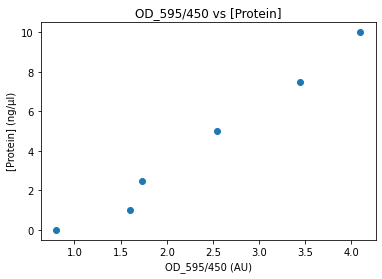

In [7]:
import matplotlib.pyplot as plt
#      paket      module    alias

spect = [0.80, 1.6, 1.73, 2.54, 3.45, 4.10]  # x-axis
protein = [0, 1, 2.5, 5, 7.5, 10]  # y-axis

plt.scatter(spect, protein)
plt.title('OD_595/450 vs [Protein]')
plt.xlabel('OD_595/450 (AU)')
plt.ylabel('[Protein] (ng/µl)')
plt.show()

(0.8, 0)  -  (1.6, 1)  -->  1.25x + -1.0
(0.8, 0)  -  (1.73, 2.5)  -->  2.688172043010753x + -2.1505376344086025
(0.8, 0)  -  (2.54, 5)  -->  2.8735632183908044x + -2.2988505747126435
(0.8, 0)  -  (3.45, 7.5)  -->  2.830188679245283x + -2.2641509433962264
(0.8, 0)  -  (4.1, 10)  -->  3.0303030303030303x + -2.4242424242424243
(1.6, 1)  -  (1.73, 2.5)  -->  11.538461538461547x + -17.461538461538478
(1.6, 1)  -  (2.54, 5)  -->  4.25531914893617x + -5.808510638297872
(1.6, 1)  -  (3.45, 7.5)  -->  3.513513513513513x + -4.621621621621621
(1.6, 1)  -  (4.1, 10)  -->  3.6000000000000005x + -4.760000000000002
(1.73, 2.5)  -  (2.54, 5)  -->  3.0864197530864197x + -2.8395061728395063
(1.73, 2.5)  -  (3.45, 7.5)  -->  2.9069767441860463x + -2.52906976744186
(1.73, 2.5)  -  (4.1, 10)  -->  3.164556962025317x + -2.974683544303798
(2.54, 5)  -  (3.45, 7.5)  -->  2.747252747252747x + -1.9780219780219772
(2.54, 5)  -  (4.1, 10)  -->  3.2051282051282057x + -3.1410256410256423
(3.45, 7.5)  -  (4.1, 10) 

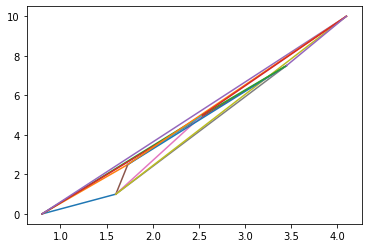

In [8]:
from statistics import mean
brStd = list(zip(spect, protein))
aa = []
bb = []
for i in range(len(brStd)):
    for j in range(i+1, len(brStd)):
        aij = (brStd[j][1] - brStd[i][1]) / (brStd[j][0] - brStd[i][0])
        bij = brStd[i][1] - aij * brStd[i][0]
        aa.append(aij)
        bb.append(bij)
        plt.plot((brStd[i][0], brStd[j][0]), (brStd[i][1], brStd[j][1]))
        print('{0}  -  {1}  -->  {2}x + {3}'.format(brStd[i], brStd[j], aij, bij))
print(mean(aa))
print(mean(bb))
plt.show()


0.08623555297523855
0.04799653353576083
0.024257933915980717
0.0070352817169324145
0.06389883353846622
0.05427951126958621


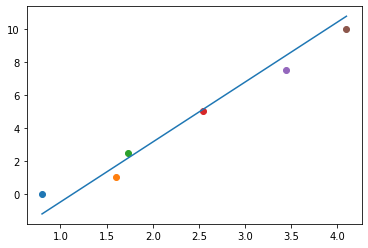

In [9]:
a = mean(aa)
b = mean(bb)
x1 = min(spect)
y1 = a * x1 + b
x2 = max(spect)
y2 = a * x2 + b
plt.plot((x1, x2), (y1, y2))
for i in brStd:
    d = abs(-a * i[0] + i[1] - b) / (a * a + 1)
    plt.scatter(i[0], i[1])
    print(d)
plt.show()

In [10]:
ymean = mean(protein)
SSres = 0.0
SStot = 0.0
for i in brStd:
    SSres = SSres + (i[1] - a*i[0] - b)**2
    SStot = SStot + (i[1] - ymean)**2
Rsq = 1 - SSres / SStot
print(Rsq)

0.9535925461502264
